## Introducción

### Estados

A continuación se muestra una tabla conocida como <b>Matriz de Transición</b> dicha tabla fue realizada en base al diagrama que se muestra abajo de dicha tabla.

La finalidad de esta tabla es obtener la probabilidad de pasar de un estado a otro, más adelante explicaré el proceso que se llevó para sacar ciertos resultados

<table>
    <tr>
        <td> i + j </td>
        <td> Casa </td>
        <td> Café </td>
        <td> Charla </td>
        <td> Computador </td>
    </tr>
    <tr>
        <td> Casa </td>
        <td> 0.6 </td>
        <td> 0.4 </td>
        <td> 0.288 </td>
        <td> 0.164 </td>
    </tr>
    <tr>
        <td> Café </td>
        <td> 0.082 </td>
        <td> 0.1 </td>
        <td> 0.72 </td>
        <td> 0.41 </td>
    </tr>
    <tr>
        <td> Charla </td>
        <td> 0.068 </td>
        <td> 0.26 </td>
        <td> 0.5 </td>
        <td> 0.34 </td>
    </tr>
    <tr>
        <td> Computador </td>
        <td> 0.2032 </td>
        <td> 0.26 </td>
        <td> 0.24 </td>
        <td> 0.5 </td>
    </tr>
    
</table>

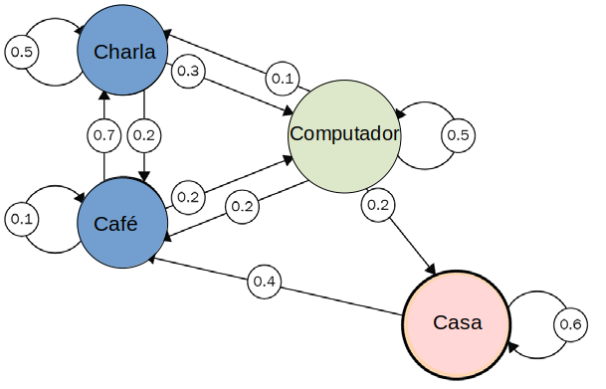

La imagen anterior muestra un diagrama de estados, en el que cada <b>Nodo</b> representa un estado posible para el agente, y en cada <b>Vertice</b> se muestra la probabilidad de llegar a ese estado.<br>

Para hacer la tabla inicialmente pensé que no tendría problemas ya que cada probabilidad viene ahí descrita, sin embargo me tocó lidiar una situación peculiar.<br>

El primer problema fue determinar la probabilidad pasar del estado <b>Casa</b> al estado <b>Computador</b>, y como pueden observar, no hay una conección directa a estos dos estados, por lo menos desde casa. Aquí fue donde descubrí una formula para calcular la probabilidad de que pasar a un estado dependiendo de un estado anterior. La formula es la siguiente:<br>



### Probabilidad de Estados anteriores en distintos caminos

Lo primero es determinar la probabilidad que queremos sacar:<br>
$P(Casa \rightarrow Computador)$

Ahora debemos ver los posibles caminos que podemos tomar desde casa para llegar al computador <br><br>

$P(R_1) = P(Casa \rightarrow Café) * P(Café \rightarrow Computador)$


En un mundo perfecto la ruta más corta sería la unica ruta, pero no:<br>

$P(R_2) = P(Casa \rightarrow Café) * P(Café \rightarrow Charla) * (Charla \rightarrow Computador)$

Sabiendo ahora todas las posibles rutas que se pueden tomar para llegar de <b>Casa</b> a <b>Computador</b> sacamos la siguiente formula:<br>

$P(Casa \rightarrow Computador)=P(R1)+P(R2)$

$P(Casa \rightarrow Computador)=P(Casa \rightarrow Café \rightarrow Computador)+P(Casa \rightarrow Café \rightarrow Charla \rightarrow Computador)$

$P(Casa \rightarrow Computador)=P(0.4*0.2)+P(0.4*0.7*0.3)$

$P(Casa \rightarrow Computador)=0.08+0.084$

$P(Casa \rightarrow Computador)=0.164$

Gracias a estas formulas es como pude realizar la matriz de transición, ya que este tipo situaciones pasan muy seguido, aun que solo sea un diagrama tan sencillo de 4 pasos, realizar una tabla de transición con probabilidad ya parece bastante complicado.

### Recompenza

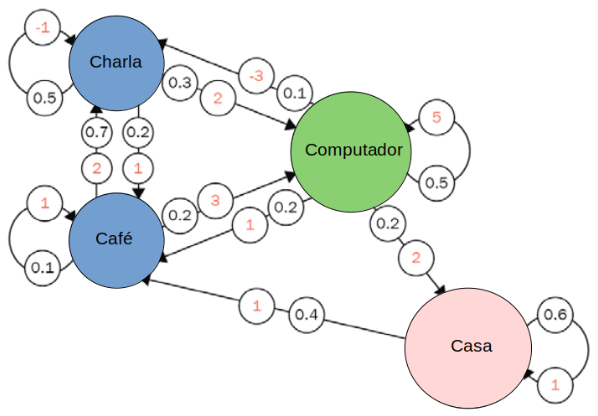

<table>
    <tr>
        <td> i + j </td>
        <td> Casa </td>
        <td> Café </td>
        <td> Charla </td>
        <td> Computador </td>
    </tr>
    <tr>
        <td> Casa </td>
        <td> 0.6 </td>
        <td> 0.4 </td>
        <td> 0.288 </td>
        <td> 0.164 </td>
    </tr>
    <tr>
        <td> Café </td>
        <td> 0.082 </td>
        <td> 0.1 </td>
        <td> 0.72 </td>
        <td> 0.41 </td>
    </tr>
    <tr>
        <td> Charla </td>
        <td> 0.068 </td>
        <td> 0.26 </td>
        <td> 0.5 </td>
        <td> 0.34 </td>
    </tr>
    <tr>
        <td> Computador </td>
        <td> 0.2032 </td>
        <td> 0.26 </td>
        <td> 0.24 </td>
        <td> 0.5 </td>
    </tr>
    
</table>

<table>
    <tr>
        <td> i + j </td>
        <td> Casa </td>
        <td> Café </td>
        <td> Charla </td>
        <td> Computador </td>
    </tr>
    <tr>
        <td> Casa </td>
        <td> 1 </td>
        <td> 1 </td>
        <td> 0 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <td> Café </td>
        <td> 0 </td>
        <td> 1 </td>
        <td> 2 </td>
        <td> 3 </td>
    </tr>
    <tr>
        <td> Charla </td>
        <td> 0 </td>
        <td> 1 </td>
        <td> -1 </td>
        <td> 2 </td>
    </tr>
    <tr>
        <td> Computador </td>
        <td> 2 </td>
        <td> 1 </td>
        <td> -3 </td>
        <td> 5 </td>
    </tr>
    
</table>

### Probabilidad que depende de una acción

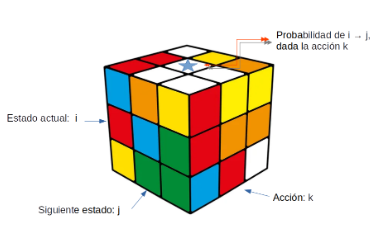

La imagen anterior representa lo que se conoce como <b>Proceso de Decisión de Markov (MDP)</b>, dicho proceso hace referencia a, dado el estado inicial y la acción tomada.
Dicho de otra forma: Probabilidad de i ➔ j, dado k.

donde:
<ul>
    <li><b>i</b>: Es el estado actual donde está el agente</li>
    <li><b>j</b>: Es el siguiente estado al que se podría dirigir el agente</li>
    <li><b>k</b>: Es la posible acción que podría tomar el agente</li>
</ul> 



## Ejemplo Agente Simple

Este ejemplo es para un Agente super basico en el que el agente desidirá entre dos posibles estados, avanzar o retrodecer

In [ ]:
import numpy as np
from typing import List
import random 

class Environment:
  
    # Define una clase Enviroment básica.
    # Admitira 10 recompenzas aleatorias
    def __init__(self,steps=10):
        self.steps = steps
        self.steps_left = steps
        self.current_state = np.array([0.0,0.0,0.0])

    # Regresa una lista de floats (type annotations)
    # Usualmente esta es una función del estado actual del Environment
    def next_observation(self,action):
        if action == 1:
            self.current_state += 1.0
        elif action == 0:
            self.current_state -= 1.0
        
        return self.current_state
    
    # Recompenza obtenida
    def reward(self,action):
        r = np.abs(random.random())
    
        if action == 0:
            r *= -1

        print('recompensa:',r)    
        return r
    
    # Determina si un episodio ha terminado o no
    def is_done(self):
        return self.steps_left == 0
    
    # Reiniciar
    def reset(self,steps=None):
        self.steps = self.steps if steps is None else steps
        self.steps_left = self.steps if steps is None else steps
        self.current_state = np.array([0.0,0.0,0.0])
    
    # Obtención de datos del Entorno
    def step(self,action):
        if self.steps_left == 0:
            raise Exception('El episodio ya fué completado!!')
        
        else:
            self.steps_left -= 1
            observation = self.next_observation(action)
            reward = self.reward(action)
            is_done = self.is_done()

            return observation, reward,is_done,_

    # Obtención de pasos
    def get_steps(self):
        return self.steps


In [ ]:
class Action:

    # Clase acción. Define una acción aleatoria
    def __init__(self, probs = [0.4,0.6], actions = [0,1]):
        self.probs = probs
        self.actions = actions

    def __call__(self):
        aux_action = np.random.choice(len(self.actions), p=self.probs)
        print('action:',aux_action)
        return self.actions[aux_action]
    

In [ ]:
class Agent:
    
    # Define una clase Agent básica
    # Lleva la cuenta de la recompenza acumulada

    def __init__(self):
        self.total_reward = 0.0
        self.current_observation = [0,0,0]
        self.action = None
        self.env = None
    
    def reset(self):
        self.total_reward = 0.0
        self.current_observation = [0,0,0]

    # Acepta la instancia del environment y hace las siguiente tareas:
    # 1. Observa el ambiente
    # 2. Toma una decisión sobre que acción tomar basado en las observaciones
    # 3. Somete la acción al ambiente
    # 4. Recibe la recompensa del paso actual y la acumula

    def set_config(self, action, env):
        self.action = action
        self.env = env
    
    def take_action(self):
        # Selecciona una acción
        action = self.action()
        # Informa al ambiente de la acción y recibe retroalimentación
        observation, reward, is_done, _ = self.env.step(action)
        self.total_reward += reward
        self.current_observation = observation

        return observation, reward, is_done, _
    
    def get_total_reward(self):
        return self.total_reward
    
    def get_current_observation(self):
        return self.current_observation
    



In [ ]:
class Trainer:

    # Instancia objetos para el entrenamiento
    def __init__(self, agent, action, env):
        self.agent = agent
        self.action = action
        self.env = env
        # Configurar al agente
        self.agent.set_config(action, env)
    
    def reset(self, steps=None):
        self.env.reset(steps)
        self.agent.reset()
    
    def episode(self):
        is_done = False
        while not is_done:
            observation, reward, is_done, aux_inf = self.agent.take_action()
        
        print('Episodio completado')
        print('Recompensa total recibida: %.4f' % self.agent.get_total_reward())
        print('Posición final:', self.agent.get_current_observation())
        print('Número de pasos', env.get_steps())
        
        

##### Hora de entrenar al Agente

In [ ]:
import numpy as np

# Configurar el Trainer
steps = 100
action = Action()
env = Environment(steps)
agent = Agent()
trainer = Trainer(agent,action,env)

# Corre episodio
trainer.episode()


In [ ]:
trainer.reset(15)
trainer.episode()

In [ ]:
trainer.episode()

## Modelo del bandido multibrazo

En este ejercicio se debe pensar en un agente con 5 posibilidades, visto desde el punto de vista de que una persona utiliza 5 maquinas traga monedas, teniendo el siguiente arreglo que muestra cuales son las recompensas positivas de cada una de las maquinas traga monedas:

[0.1, 0.3, 0.05, 0.55, 0.4] <br>

sin embargo, recordemos que el agente iniciará sin conocer estas probabilidades, las irá aprendiendo con forme se dé cuenta de que estas probabilidades le dan poca recomenza.<br>

Para este ejercicio se utilizará la <b>política e-voraz</b>, esta politica se basa en que el agente siempre tomará la mejor desición basandose en el conocimiento que tiene en ese momento, y en un momento aleatorio decidirá ejecutar una acción aleatoria, sin tomar en cuenta los conocimientos actuales, esto ayudandole a que pueda explorar otros horizontes y tratar de que no se quede atascado.


### Implementación

In [ ]:
import numpy as np
from typing import Union

class Action:
    
    # Clase abstracta que convierte puntajes (scores) en acciones
    def __call__(self,scores):
        raise NotImplementedError

class ArgmaxAction(Action):
    
    # Selecciona la acción usando argmax
    def __call__(self, scores):
        assert isinstance(scores,np.ndarray)
        action = np.argmax(scores)
        print(action)
        return action

class EpsilonGreedyAction(Action):

    # Selecciona una acción usando la política epsilon-voraz
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
    
    def __call__(self, scores):
        assert isinstance(scores, np.ndarray)
        result = np.random.uniform()

        if result < self.epsilon:
            action = np.random.randint(0, len(scores))
        else:
            action = np.argmax(scores)
        
        
        return action

In [ ]:
import numpy as np

class Environment:
    """
    Clase Environment para bandido mutibrazo
    bandits: vector con las probabilidades de entrega de recompenza en cada brazo
    num_iteration: Número de iteraciones previsto para el entrenamiento
    itration: iteración acutal del agente (número de pasos)
    """
    def __init__(self, bandits=None, num_iterations=None):
        self.bandits_prob = bandits
        self.num_iterations = num_iterations
        self.iteration = 0
    
    def reset(self, bandits=None, num_iterations=None):
        self.iteration = 0
        if bandits is not None:
            self.bandits_prob = bandits
        if num_iterations is not None:
            self.num_iterations = num_iterations
    
    def is_done(self):
        return self.iteration >= self.num_iterations

    def get_reward(self, arm):
        # Devuelve: 1 = recompensa; 0 = sin recompensa
        # Con probabilidad bandits[arm] obtienen una recompensa.
        result = np.random.uniform()
        reward = int(result <= self.bandits_prob[arm])
        #print(reward)
        return reward

    def get_iteration(self):
        return self.iteration
    
    def step(self,arm:Action):
        # Tome la action, calcule la recompensa y verifique is_done
        # Calcula la recompensa
        reward = self.get_reward(arm)
        # Incrementa iteration del episodio
        self.iteration += 1
        # return [next_obs, reward, is_done, info]
        return [None, reward, self.is_done(), None]
    
    def get_steps(self):
        return self.num_iterations
    
  

In [ ]:
class Agent:
    def __init__(self):
        self.action = None
        self.env = None
        self.num_bandits = None
        self.total_rewards = None
        self.total_attempts = None
        self.average_rewards = None
    
    def config(self, action_selector, env, num_bandits):
        self.action = action_selector
        self.env = env
        self.num_bandits = num_bandits
        self.total_rewards = np.zeros(self.num_bandits)
        self.total_attempts = np.zeros(self.num_bandits)
        self.average_rewards = np.zeros(self.num_bandits)
    
    def take_action(self):
        action = self.action(self.average_rewards)
        _, reward, is_done, _ = env.step(action)
        self.update(reward, action)
        return _, reward, is_done, _

    def update(self,reward,action):
        # Acumula la recompensa para este brazo
        self.total_rewards[action] += reward
        # Acumula los intentos de este brazo
        self.total_attempts[action] += 1
        # Calcula la recompensa promedio actual para este brazo
        self.average_rewards[action] = self.total_rewards[action] / float(self.total_attempts[action])
    
    def reset(self):
        self.total_rewards = np.array([0 for _ in range(self.num_bandits)])
        self.total_attempts = np.array([0 for _ in range(self.num_bandits)])
        self.average_rewards = np.array([0 for _ in range(self.num_bandits)])

    def set_action_selector(self, action_selector):
        self.action = action_selector

    def get_average_rewards(self):
        return self.average_rewards

    def get_total_rewards(self):
        return self.total_rewards
        


In [ ]:
class Trainer():
    
    # Instanciando objetos para el entrenamiento
    def __init__(self, agent, action, env, num_bandits, verbose=True):
        self.action = action
        self.env = env
        self.agent = agent
        self.verbose = verbose
        # Configura al agente
        self.agent.config(action, env, num_bandits)
    
    def reset(self, bandits=None, num_iterations=None):
        self.env.reset(bandits, num_iterations)
        self.agent.reset()
    
    def episode(self):
        is_done = False
        if self.verbose:
            print('Avance de la estimación cada 100 iteraciones\n')
        while not is_done:
            _, _, is_done, _ = self.agent.take_action()
            if self.verbose and (env.get_iteration() % 100 == 0):
                print('Las recompensas de los bandidos en esta iteración {} son {}'.format(env.get_iteration(),
                                                                                           ['{:.2f}'.format(elem) for elem in self.agent.get_average_rewards()]))
            
        # imprime resultado finales
        best_bandit = np.argmax(self.agent.get_average_rewards())
        print('\nEl mejor bandido es el número {} con un promedio observado de recompensa {:.4f}'
              .format(best_bandit,self.agent.get_average_rewards()[best_bandit]))
        print('La recompensa total observada en los {} episodios ha sido {}'
          .format(env.get_iteration(), sum(agent.get_total_rewards())))


In [ ]:
bandits = np.array([0.1, 0.3, 0.05, 0.55, 0.4])
num_iterations = 1000 # episodes
epsilon = 0.1
verbose = True

# seed para reproducibilidad
# Función para obtener una misma cantitad de numeros aleatorios
# en cada ejecución del codigo
np.random.seed(600) 


# instancia los objetos
action_selector = EpsilonGreedyAction(epsilon)
env = Environment(bandits, num_iterations)
agent = Agent()
trainer = Trainer(agent, action_selector, env, len(bandits))

# corre episodio
print('vector de probabilidades a estimar: ', bandits)
trainer.episode()

In [ ]:
trainer.reset(bandits,num_iterations)
trainer.episode()

## OpenAI Gym (Introducción)

En esta sección se verá el framework llamado OpenAI Gym, que tiene las funciones esenciales para el desarrollo de Agentes Inteligentes.

El framework Gym, tiene una clase principal llamada Env (environment), esta clase viene con distintos metodos:

<ul>
    <li>Acciones que solo pueden ser ejecutadas por el Agente</li>
    <li>Tamaño y bordes que el ambiente le puede proveer al agente, haciendo que esto actue como una forma de observación para el Agente.</li>
    <li>El metodo step, el cual obtiene la acción y retorna un cambio en el entorno, así como una recompenza y controla el movimiento de los episodios.</li>
    <li>El método reset que reinicia los estados del entorno</li>
</ul>


#### Lista de Ambientes en OpenAI Gym

In [ ]:
import gym
import numpy as np


all_envs = list(gym.envs.registry.keys())

for x in range(len(all_envs)):
    print('['+str(x+1)+'] '+str(all_envs[x]),sep='\n')

#### Explorando la librería OpenAI Gym

In [ ]:
# Obtieniendo el entorno
env = gym.make('CartPole-v1')

# Obteniendo una observación del entorno
obs = env.reset()
obs

In [ ]:
# Mostrando el espacio de acciónes
env.action_space

El espacio de acciones es tipo "discrate" y contiene 2 posibles acciones.

In [ ]:
# Mostrando el espacio de observacion
env.observation_space

El espacio de observaciones, es de tipo "Box" y contiene 4 valores que se representan como los limites de cada observación

In [ ]:
action = 0
observation, reward, done, _ , info = env.step(action)
print('obs: ', np.round(observation,4), end='; \n')
print('reward: ', reward, end='; \n')
print('done: ', done, end='; \n')
print('info: ', info,end='; \n')
#print('_: ', _,end=';')

In [ ]:
# Una muestra aleatoria del espacio de observación
env.observation_space.sample

#### Interactuando con el ambiente de Gym

In [ ]:
import numpy as np
import gym

env = gym.make('CartPole-v1')

# Revisando los objetos de Gym:
print('Espacio de acciones:',env.action_space)
print('Espacio de observaciones:',env.observation_space)
print()

In [ ]:
# Interactuando con Gym:
observation = env.reset()
print('Comenzamos')
print('obs:',observation)

In [ ]:
for i in range(100):
    action = env.action_space.sample()
    observation,reward,done,_,info = env.step(action)
    print(i,end=' \n')
    print('primera observación: ', np.round(observation,4), end='; ')
    print('reward: ', reward, end='; ')
    print('done: ', done, end='; ')
    print('info: ', info)

    if done:
        observation = env.reset()

env.close()
print('Finalizado!!!')


## CartPole en OpenAI Gym

![image.png](https://raw.githubusercontent.com/AprendizajeProfundo/Diplomado-Avanzado/c01c908a0388a58b45cac707cb716438197a2d88/Aprendizaje%20Reforzado/Imagenes/Ejemplo_polea.gif)

En este caso se tratará de realizar un Agente Inteligente utilizando la librería de OpenAI Gym, con un problema conocido como "CartPole", dicho problema consiste en que se tiene un palo en la parte superior de un "pasado" siendo este una base que se mueve depenediendo de la inclinación del palo.
<br><br>
Por lo que el objetivo de este Agente es crear un sistema inteligente que aprenda a no caerse de esta base.

#### Observaciones de CartPole

In [ ]:
import gym

env = gym.make('CartPole-v1')
obs = env.reset()
obs

El entorno retorna una obsercación en forma de un arreglo de longitud 4, dicho arreglo contiene unos datos que corresponden a:

<ul>
    <li>Coordenada del centro de masas</li>
    <li>Velocidad</li>
    <li>Ángulo con respecto a la plataforma</li>
    <li>Velocidad angular</li>
</ul>

#### Incorporación de la Clase Agent

In [ ]:
class Agent:
    """
    Define una clase Agent básica.
    lleva la cuenta de la recompensa acumulada
    """
    def __init__(self,env):
        self.total_reward = 0.0
        self.total_steps = 0
        self.current_observation = None
        self.env = env
    
    def action(self):
        return self.env.action_space.sample()
    
    def take_action(self):
        action = self.action()
        observation, reward, is_done, _, info = self.env.step(action)
        self.total_reward += reward
        self.current_observation = observation
        self.total_steps += 1
        return is_done

    def get_total_reward(self):
        return self.total_reward    
    
    def get_current_observation(self):
        return self.current_observation
    
    def get_total_steps(self):
        return self.total_steps

#### Ejecución de un episodio

In [ ]:
import gym 

# Obteniendo el ambiente de CartPole-V1
env = gym.make('CartPole-v1',render_mode="human")
# Inicianlizando el ambiente
_ = env.reset()
# Creando el agente y ejecutando su acción
agent = Agent(env)
is_done = agent.take_action()

while not is_done:
    is_done = agent.take_action()

    env.render()

env.close()

print("Recompensa total recibida: %.4f" % agent.get_total_reward())
print("Posición final: ", agent.get_current_observation())
print("número de pasos en el episodio", agent.get_total_steps())


#### Incorporando la Clase RandomActionWrapper

In [ ]:
import gym
from typing import TypeVar
import random

Action = TypeVar('Action')

class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env, epsilon=0.1):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon
    
    def action(self, action: Action) -> Action:
        if random.random() < self.epsilon:
            print('Random!')
            return self.env.action_space.sample()
        return action



#### Correiendo un episidodio con la nueva clase incorporada

In [ ]:
# Crea el ambiente con la envoltura RandomActionWrapper
env = RandomActionWrapper(gym.make('CartPole-v1'))

# inicializa el ambiente
_ = env.reset()

# crea el agente y ejecuta una primera acción
agent = Agent(env)
is_done = agent.take_action()
    
while not is_done:
    is_done = agent.take_action()

print("Recompensa total recibida: %.4f" % agent.get_total_reward())
print("Posición final: ", agent.get_current_observation())
print("número de pasos en el episodio", agent.get_total_steps())

## Frozen Lake con OpenAI Gym

#### Introducción Frozen Lake

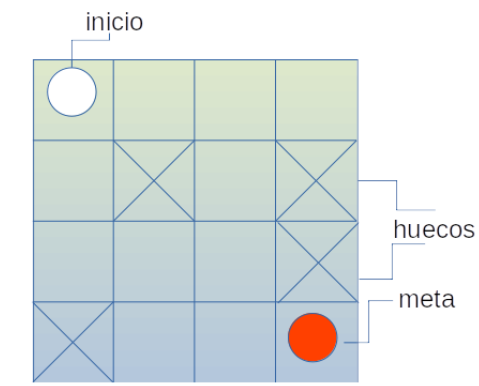

Este entorno proporcionado por la librería OpenAI Gym, cuenta con un espacio de estados de 16 posiciones, por lo que es considerado un conjunto de observaciones discretas de 16 valores.<br><br>

Cada una de las casillas del espacio de estados cuenta con una numeración del 0 al 15, ordenados de izquierda a derecha.

In [ ]:
# Observaciones del ambiente Fozen Lake
import gym

# crea una instancia del ambiente y lo configura en el estado inicial
e = gym.make("FrozenLake-v1")
obs = e.reset()
obs

#### Implementación de la Clase Agent

In [ ]:
class Agent:
    """Define una clase Agent básica. 
    lleva la cuenta de la recompensa acumulada"""
    def __init__(self, env):
        self.total_reward = 0.0
        self.total_steps = 0
        self.current_observation = None
        self.env = env
        
    def actions(self):
        return self.env.action_space.sample()
    
    def take_action(self):
        action = self.actions()
        observation, reward, is_done, _, info = self.env.step(action)
        self.total_reward += reward
        self.current_observation = observation
        self.total_steps += 1
        return observation, reward, is_done, info
    
    def get_total_reward(self):
        return self.total_reward
    
    def get_current_observation(self):
        return self.current_observation
    
    def get_total_steps(self):
        return self.total_steps

#### Ejecutando los episodios

In [ ]:
import gym


# crea el ambiente
env = gym.make('FrozenLake-v1',render_mode="human")

# inicializa el ambiente
_ = env.reset()

# crea el agente y ejecuta una primera acción
agent = Agent(env)
_, _, is_done, _ = agent.take_action()


while not is_done:
    is_done = agent.take_action()
    env.render()
    
    
env.close()

print("Recompensa total recibida: %.4f" % agent.get_total_reward())
print("Posición final: ", agent.get_current_observation())
print("número de pasos en el episodio", agent.get_total_steps())


#### Envolturas (Wrappers)

In [ ]:

import numpy as np

class DiscreteOneHotWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super(DiscreteOneHotWrapper, self).__init__(env)
        assert isinstance(env.observation_space, gym.spaces.Discrete)
        shape = (env.observation_space.n, )
        self.observation_space = gym.spaces.Box(
            0.0, 1.0, shape=shape, dtype=np.float32)
        
    def observation(self, observation):
        res = np.copy(self.observation_space.low)
        res[observation] = 1.0
        return res

#### Incorporando Clase Rewards

## Método de Entropía Cruzada

#### Introducción

Este metodo se basa en la realización de politicas que son entranadas por una red neuronal, dicha politica procesa las acciones tomadas por el agente y estás devuelven una recompensa en base a la acción tomada y la posición actúal en el entorno.


Dicho esto, las caracteriticas de nuestro problema anterior "Frozen Lake" conveirte nuestro problema en uno similar a un problema de clasificación. En este caso la salida de nuestra red neuronal es un vector que representa una dsitribución de probabilidad sobre el espacio de acciones.

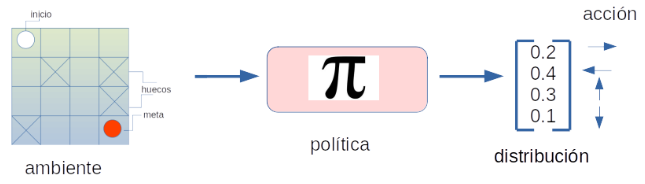

En este caso se considera que tenemos una ley de políticas estocásticas, ya que devuelven una distribución de probabilidad sobre acciones en lugar de devolver una única acción determinista.

Por lo tanto la distribución de políticas o reglas se inicializan de forma aleatoria, la cual se va a ir ajustando con el paso de los entrenamientos y de nuevos episodios, ajustando su política con ayuda de la red neuronal para que sea más eficiente.


#### Datos de Entrenamiento

Dado que estamos considerando utilizar una red neuronal es logico pensar que necesitaremos un conjunto de datos de entrenamiento para este metodo de entropía cruzada, por lo que en este caso, utilizando un modelo de aprendizaje supervisado, utilizaremos los datos obtenidos de los estados observados y las acciones como resultado, objetivo o etiquetas de salida.

#### Algoritmo de Entropía Cruzada

Este algoritmo es considerado como un <b>algotimo evolutivo</b>, ya que sigue las caracteristicas de los algoritmos geneticos. Consistiendo en:

<ul>
    <li>Generar lotes de episodios</li>
    <li>Desechar los episodios malos en un lote para entrenar la red neuronal del agente en los mejores episodios</li>
</ul>

### Implementación (Pytorch)

#### Importando librerías

In [1]:
# Importando Librerías Necesarias:
import gym, gym.spaces
from collections import namedtuple
import numpy as np
import torch
from torch import nn
import torch.optim as optim

#### Conversión de datos a tipo OneHot

In [2]:
class DiscreteOneHotWrapper(gym.ObservationWrapper):
    def __init__(self,env):
        super(DiscreteOneHotWrapper, self).__init__(env)
        assert isinstance(env.observation_space, gym.spaces.Discrete)
        shape = (env.observation_space.n,)
        self.observation_space = gym.spaces.Box(
            0.0, 1.0, shape = shape, dtype = np.float32
        )
    
    def observation(self, observation):
        res = np.copy(self.observation_space.low)
        res[observation] = 1.0
        return res
 

#### Jerarquía de clases Net

In [3]:
class Net_basic(nn.Module):
    def __init__(self, obs_size, hidden_size, n_actions):
        super(Net_basic, self).__init__()
        
        # configura bloque secuencial
        self.net = nn.Sequential(
            nn.Linear(obs_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, n_actions)
        )
        
        # configura optimizadores y función de pérdida
        # debe implementarse en cada caso
        self.optimizer = self.configure_optimizers()
        self.loss = self.configure_looses()

    def forward(self, x):
        return self.net(x)
 
    def configure_optimizers(self):
        raise NotImplementedError
    
    def configure_looses(self):
        raise NotImplementedError
    
    def training_step(self, train_batch):
        raise NotImplementedError




In [4]:
class Net(Net_basic):
    def __init__(self, obs_size, hidden_size, n_actions):
        super().__init__(obs_size, hidden_size, n_actions)
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

    def configure_looses(self):
        loss = torch.nn.CrossEntropyLoss()
        return loss

    def training_step(self, train_batch):
        x,y = train_batch
        y = y.long()
        y_hat = self.net(x)
        loss = self.loss(y_hat,y)
        return loss




#### Implementando Clase Trainer

In [5]:
class Trainer(object):
    def __init__(self, model, writer, verbose = True):
        self.model = model
        self.writer = writer
        self.verbose = verbose
    
    def fit(self, iter_no, train_dataloader, reward_bound, reward_mean):
        loss_l = []
        for batch in train_dataloader:
            self.model.configure_optimizers().step()
            self.model.configure_looses()
            self.model.optimizer.zero_grad()
            loss = self.model.training_step(batch)
            loss_l.append(loss.item())
            loss.backward()
            
        
        mean_loss = np.mean(loss_l)

        # Escribiendo en el log
        self.writer.add_scalar("perdida",mean_loss,iter_no)
        self.writer.add_scalar('Recompensa_promedio',reward_mean,iter_no)
        self.writer.add_scalar('Recompensa_frontera',reward_bound,iter_no)

        # Escribiendo en la pantalla
        if self.verbose:
            print('%d: pérdida promedio = %.3f, recomensa promedio = %.1f, cota recompensa = %.1f' % (
                iter_no, mean_loss, reward_mean, reward_bound))



#### Implementación de Clase Batch

In [6]:
#Guardando los datos de un episodio completo:
episode = namedtuple('Episode',field_names=['reward','steps'])

# Alacenando la observación y acción de cada episodio
episode_step = namedtuple('EpisodeStep',field_names=['observation','action'])

class Batch(object):
    """
    Implementa la generación iterativa de lotes de datos
    """
    def __init__(self, env, net, batch_size):
        self.env = env
        self.net = net
        self.batch_size = batch_size

    # Metodo Iterable
    def __iter__(self):
        return self
    
    # Metodo iterador
    def __next__(self):
    
        # Lista del lote de datos
        batch = []
        
        # Recompensa de cada episodio
        episode_reward = 0.0

        # lista de observaciones y acciones de cada episodio
        episode_steps = []

        # Reiniciando el ambiente para generar y obtener datos:
        obs, _ = self.env.reset()
        obs = np.array(obs)
        
        # Iniciando la función softmax
        sm = nn.Softmax(dim=0)

        # Ciclo para generar lotes de datos

        while True:
            # convirtiendo la observación a un tensor con Numpy
            obs_v = torch.FloatTensor(obs)
            
            # self.net(obs_v) : Calcula el tensor de puntaje para las acciones
            # Transforma los puntajes de la red en una distribución de probabilidad que viene del tensor
            act_probs_v = sm(self.net(obs_v))

            # extrae la distribución del tensor a un d-array de Numpy
            act_probs = act_probs_v.data.numpy()
            
            # Selecciona una acción aleatoriamente usando la distribución
            action = np.random.choice(len(act_probs), p=act_probs)
            
            # entrega la acción al ambiente y recibe una respuesta
            next_obs, reward, is_done, _, _ = self.env.step(action)
            
            # actualiza la recompenza
            episode_reward += reward

            # agrega la pareja (observación, acción) a la lista de pasos
            episode_steps.append(episode_step(observation=obs, action=action))

            # Cuando el episodio termine:
            if is_done:
                # agregar los datos:
                batch.append(episode(reward=episode_reward, steps=episode_steps))

                # reiniciar los objetos para el siguiente episodio
                episode_reward = 0.0
                episode_steps = []
                next_obs, _ = self.env.reset()
                
                # si completa el lote, lo retorna y termina:
                if len(batch) == self.batch_size:
                    return batch
            
           
            obs = np.array(next_obs)
            
            #print(obs,end='\n\n')



#### Probando el iterador de lotes (ForzenLake)

In [ ]:
# Seleccionando el ambiente FrozenLake
env = DiscreteOneHotWrapper(gym.make("FrozenLake-v1"))

# extraer los tamaños de acciones y observaciones en el ambiente
obs_size = env.observation_space.shape[0]
n_actions = env.action_space.n

# Definiendo las neuronas de la capa oculta de la red:
hidden_size = 128

#instanciando Net:
net = Net(obs_size,hidden_size,n_actions)

# tamaño de lotes:
batch_size = 2

# Instanciando Batch:
batch = Batch(env,net,batch_size)

# extraer el primer lote de datos:
dato = next(batch)
dato

#### Probando el iterador de lotes (CartPole)

In [ ]:
# selecciona un ambiente CartPole
env = gym.make("CartPole-v1")

# extrae tamaños de acciones y observaciones en el ambiente
obs_size = env.observation_space.shape[0]
n_actions = env.action_space.n
# define tamaño capa oculta de la red
hidden_size = 128
#instancia un objeto Net
net = Net(obs_size, hidden_size, n_actions)

# define tamaño de los lotes
batch_size = 5
# instancia un iterador Batch
batch = Batch(env, net, batch_size)

# extrae el primer lote de datos
dato = next(batch)
dato

#### Implementando Clase Agente

In [7]:
from torch.utils.data import Dataset, TensorDataset, DataLoader

class Agent:
    def __init__(self, batch_iterator, percentile, batch_size=1):
        self.batch_iterator = batch_iterator
        self.percentile = percentile
        self.batch_size = batch_size

    def take_action(self):
        # Tomando un lote da los datos del iterador
        data_batch = next(self.batch_iterator)
        
        # Extrayendo las recompensas del batch en una lista
        rewards = list(map(lambda s: s.reward, data_batch))

        # Extrayendo los mejores episodios en un percentil del 70%
        reward_bound = np.percentile(rewards, self.percentile)

        # Calculando el promedio de las recompensas:
        reward_mean = float(np.mean(rewards))

        # Extrayendo observaciones y acciones de los mejores episodios (episodios élite)
        train_obs = []
        train_act = []
        for example in data_batch:
            # Sí una recompenza del lote es menor a la 
            # recompenza de los episodios de élite.
            # entonces lo pasa por alto. 
            if example.reward < reward_bound:
                continue

            # Cada episodio de élite obtiene observación y acción
            # Agregando cada uno a su respectiva lista:
            train_obs.extend(map(lambda step: step.observation, example.steps))
            train_act.extend(map(lambda step: step.action, example.steps))

        # Convierte estas listas en tensores para red neuronal
        train_obs_v = torch.FloatTensor(train_obs)
        train_act_v = torch.FloatTensor(train_act)

        # Creamos el dataset
        train_dataset = TensorDataset(train_obs_v, train_act_v)

        # Creamos el dataloader
        train_dataloader = DataLoader(dataset= train_dataset, batch_size= self.batch_size)

        # Entrega de datos:
        return train_dataloader, reward_bound, reward_mean
    
 
    
        

#### Prueba del Agente (CartPole)

In [ ]:
# Seleccionamos el ambiente CartPole:
env = gym.make('CartPole-v1')

# Obtenemos los tamaños de acciones y observaciones 
obs_size = env.observation_space.shape[0]
n_actions = env.action_space.n

# numero de neuronas de la capa oculta:
hidden_size = 128

# Instanciamos Net
net = Net(obs_size, hidden_size, n_actions)

# Tamaño de lotes:
batch_size = 20

# Instanciamos batch
batch = Batch(env, net, batch_size)

# Definimos el porcentaje del percentil de datos:
percentile = 70

# Instanciamos el Agente:
agent = Agent(batch, percentile)

# Entregamos un lote de episodios de élite:
dato = agent.take_action()
dato

#### Entrenamos a CartPole

In [16]:
from torch.utils.tensorboard import SummaryWriter

# Seleccionamos el ambiente CartPole:
env = gym.make('CartPole-v1',render_mode="human")

env.reset()
# Obtenemos los tamaños de acciones y observaciones 
obs_size = env.observation_space.shape[0]
n_actions = env.action_space.n

# numero de neuronas de la capa oculta:
hidden_size = 128

# Instanciamos Net
net = Net(obs_size, hidden_size, n_actions)

# Tamaño de lotes:
batch_size = 20

# Instanciamos batch
batch = Batch(env, net, batch_size)

# Definimos el porcentaje del percentil de datos:
percentile = 70

# Instanciamos el Agente:
agent = Agent(batch, percentile)

# instanciamos writer para tensorboard
writer = SummaryWriter(comment='Entrenamiento de CartPole')

# Agregamos un grado del modelo a tensorboard:
"""
episode = next(batch[0])
obs = episode.steps
writer.add_graph(net, obs)
"""



# Intanciamos Trainer
trainer = Trainer(model=net, writer=writer)

# Ciclo de entrenamiento:
min_reward = 200 
max_iterations = 300
done = False

iter_no = 0

while not done:
    iter_no += 1
    env.render()
    # Hacemos que el Agente pida datos:
    dataloader, reward_bound, reward_mean = agent.take_action()

    # Realiza un ajuste a los pesos de la red (entrenamiento)
    trainer.fit(iter_no, dataloader, reward_bound, reward_mean)
    print(str(dataloader))
    if reward_mean > min_reward:
        print('Terminó el Entrenamiento!!!...')
        done = True

    if iter_no == max_iterations:
        print('Terminado por máximo número de iteraciones. No concluyó el entrenamiento')
        done = True


env.close()

c:\Users\gaels\OneDrive\Escritorio\Cursos de Machine Learning\VirtualMachine\IA\lib\site-packages\gym\utils\passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


1: pérdida promedio = 0.701, recomensa promedio = 22.9, cota recompensa = 26.9
2: pérdida promedio = 0.685, recomensa promedio = 28.1, cota recompensa = 32.4
3: pérdida promedio = 0.671, recomensa promedio = 33.7, cota recompensa = 37.9
4: pérdida promedio = 0.669, recomensa promedio = 51.2, cota recompensa = 62.2
5: pérdida promedio = 0.544, recomensa promedio = 46.0, cota recompensa = 50.6
6: pérdida promedio = 0.449, recomensa promedio = 84.0, cota recompensa = 82.1
7: pérdida promedio = 0.171, recomensa promedio = 67.2, cota recompensa = 82.3
8: pérdida promedio = 0.128, recomensa promedio = 85.2, cota recompensa = 85.8
9: pérdida promedio = 0.131, recomensa promedio = 104.2, cota recompensa = 108.6
10: pérdida promedio = 0.254, recomensa promedio = 114.9, cota recompensa = 121.9
11: pérdida promedio = 0.091, recomensa promedio = 77.7, cota recompensa = 81.6
12: pérdida promedio = 0.261, recomensa promedio = 91.2, cota recompensa = 103.2
13: pérdida promedio = 0.082, recomensa prom

## Ejemplo Q-Learning